<a href="https://colab.research.google.com/github/HWANG-HOE-SUN/Code-/blob/main/DAPROG_%EC%88%98%ED%95%99%EC%BD%94%EB%93%9C%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from math import *
import numpy as np
import sys
import matplotlib.pyplot as plt

> https://hamait.tistory.com/862 (DTW 코드 출처)

In [ ]:
def DTW(A, B, window=sys.maxsize, d=lambda x, y: abs(x - y)):
  # 비용 행렬 초기화
  A, B = np.array(A), np.array(B)
  M, N = len(A), len(B)
  cost = sys.maxsize * np.ones((M, N))

  # 첫번째 로우,컬럼 채우기
  cost[0, 0] = d(A[0], B[0])
  for i in range(1, M):
    cost[i, 0] = cost[i - 1, 0] + d(A[i], B[0])

  for j in range(1, N):
    cost[0, j] = cost[0, j - 1] + d(A[0], B[j])
  # 나머지 행렬 채우기
  for i in range(1, M):
    for j in range(max(1, i - window), min(N, i + window)):
      choices = cost[i - 1, j - 1], cost[i, j - 1], cost[i - 1, j]
      cost[i, j] = min(choices) + d(A[i], B[j])

  # 최적 경로 구하기
  n, m = N - 1, M - 1
  path = []

  while (m, n) != (0, 0):
    path.append((m, n))
    m, n = min((m - 1, n), (m, n - 1), (m - 1, n - 1), key=lambda x: cost[x[0], x[1]])

  path.append((0, 0))

  return cost[-1, -1], path

### DAPROG 코드 구현

In [149]:
A, use_B

(array([4, 6, 5, 4, 2, 7]), array([ 7,  8,  5,  9, 11,  9]))

In [146]:
A = np.array([4,6,5,4,2,7]) # target길이는 6
B = np.array([7,8,5,9,11,9,8,6,5,10]) # 가지고있는 reference길이는 10

use_B = B[0:len(A)] # 전체 범위를 사용하지않고, Target의 열화 범위에만 맞추어서 사용한다(for 선형적 Optimal Warping Path)

dtw_result = DTW(A,use_B,window=6) # window값은 Target 데이터 수에 맞추어서 적용

In [147]:
dtw_result[1] # Path Matching(index,index)

[(5, 5), (5, 4), (5, 3), (4, 2), (3, 2), (2, 2), (1, 1), (0, 0)]

Total Distance is  17.0


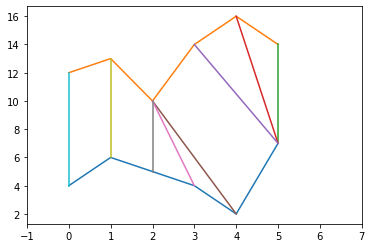

In [151]:
cost, path = DTW(A, use_B, window = 6)
print('Total Distance is ', cost)

offset = 5
plt.xlim([-1, max(len(A), len(use_B)) + 1])
plt.plot(A)
plt.plot(use_B + offset)
for (x1, x2) in path:
  plt.plot([x1, x2], [A[x1], use_B[x2] + offset])
plt.show()

In [152]:
path.reverse() # 마지막 매칭부터 되어있으므로 리스트 순서를 뒤집는다.
path

[(0, 0), (1, 1), (2, 2), (3, 2), (4, 2), (5, 3), (5, 4), (5, 5)]

In [153]:
x_train = np.array([x[0] for x in path])
y_train = np.array([x[1] for x in path])

In [154]:
# 그라디언트 부스트 방식으로 선형회귀 수행

W = 0.0
b = 0.0

n_data = len(x_train)

epochs = 5000
learning_rate = 0.01

for i in range(epochs):
    hypothesis = x_train * W + b
    cost = np.sum((hypothesis - y_train) ** 2) / n_data
    gradient_w = np.sum((W * x_train - y_train + b) * 2 * x_train) / n_data
    gradient_b = np.sum((W * x_train - y_train + b) * 2) / n_data

    W -= learning_rate * gradient_w
    b -= learning_rate * gradient_b

    if i % 100 == 0:
        print('Epoch ({:10d}/{:10d}) cost: {:10f}, W: {:10f}, b:{:10f}'.format(i, epochs, cost, W, b))

print('W: {:10f}'.format(W))
print('b: {:10f}'.format(b))
print('result : ')
print(x_train * W + b)

Epoch (         0/      5000) cost:   7.875000, W:   0.197500, b:  0.047500
Epoch (       100/      5000) cost:   0.443636, W:   0.718428, b:  0.141687
Epoch (       200/      5000) cost:   0.443255, W:   0.722966, b:  0.122982
Epoch (       300/      5000) cost:   0.443111, W:   0.725759, b:  0.111466
Epoch (       400/      5000) cost:   0.443057, W:   0.727478, b:  0.104377
Epoch (       500/      5000) cost:   0.443036, W:   0.728537, b:  0.100013
Epoch (       600/      5000) cost:   0.443028, W:   0.729189, b:  0.097326
Epoch (       700/      5000) cost:   0.443025, W:   0.729590, b:  0.095672
Epoch (       800/      5000) cost:   0.443024, W:   0.729837, b:  0.094654
Epoch (       900/      5000) cost:   0.443024, W:   0.729989, b:  0.094027
Epoch (      1000/      5000) cost:   0.443023, W:   0.730083, b:  0.093641
Epoch (      1100/      5000) cost:   0.443023, W:   0.730140, b:  0.093404
Epoch (      1200/      5000) cost:   0.443023, W:   0.730176, b:  0.093257
Epoch (     

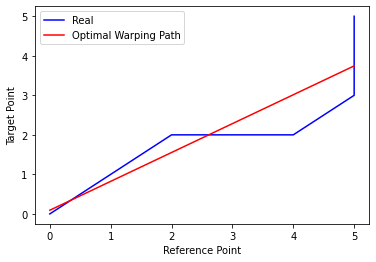

In [155]:
plt.plot(x_train,y_train,'b',label='Real') # 참값(실제 DTW매칭)
plt.plot(x_train,x_train * W + b,'r',label='Optimal Warping Path') # DTW매칭에 대한 선형 회귀
plt.xlabel('Reference Point')
plt.ylabel('Target Point')

plt.legend()

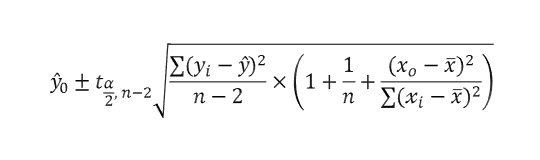

> t값 자동으로 구하기(외부 싸이트 활용)

In [35]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [36]:
from selenium import webdriver
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
from urllib.parse import quote_plus
from selenium.webdriver.common.keys import Keys
import time

In [37]:
url = 'http://www.ttable.org/student-t-value-calculator.html'

In [156]:
# 외부 사이트를 통해서 t값 계산
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)
driver.get(url)

page_body_path = '//*[@id="wsite-content"]/div/div/div/div' # 광고창 제거를 위해 page바디 클릭
page_body = driver.find_element_by_xpath(page_body_path)
page_body.click()

last_height = driver.execute_script("return document.body.scrollHeight")
print(last_height) # 전체 페이지 스크롤 높이
driver.execute_script("window.scrollTo(0, 350)") 

input_freedom = driver.find_element_by_xpath('//*[@id="freedom"]') # 3,5,6등
input_alpha = driver.find_element_by_xpath('//*[@id="level"]') # 0.05등
calcul_button = driver.find_element_by_xpath('//*[@id="calculator"]/div/div[1]/div[3]/div/button')

print('Input Freedom : ')
input_freedom.send_keys(input())
print('Input Alpha : ')
input_alpha.send_keys(input())

# 계산 버튼 클릭
driver.execute_script("arguments[0].click();", calcul_button)

# 스크롤 다운
driver.execute_script("window.scrollTo(0, 200)") 
# 밸류 얻어오기
two_tail_value = driver.find_element_by_xpath('//*[@id="tright"]')
print(two_tail_value.text)
two_tail_value = np.float(two_tail_value.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  


1992
Input Freedom : 
4
Input Alpha : 
0.05
2.7763


In [125]:
two_tail_value # t값 메커니즘 완료 
# 자유도 = 4, a값 = 0.05

2.7763

> SSE구하기

In [157]:
real_y = y_train 
pred_y =  x_train * W + b 
real_y, pred_y

(array([0, 1, 2, 2, 2, 3, 4, 5]),
 array([0.09302326, 0.82325581, 1.55348837, 2.28372093, 3.01395349,
        3.74418605, 3.74418605, 3.74418605]))

In [158]:
def calcul_Syx(real_y,pred_y):
  sse = sum((real_y-pred_y)*(real_y-pred_y))
  free_level = len(real_y)-2 # n-2
  Syx = np.sqrt(sse/free_level)
  return Syx

In [159]:
Syx = calcul_Syx(real_y,pred_y)
Syx

0.7685685879728658

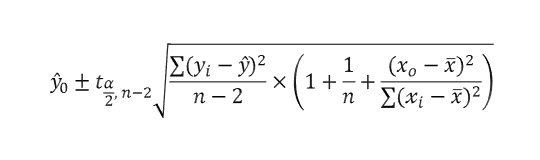

### PI 구하기 (최종 취합)

In [160]:
def calcul_PI(t,Syx,x,y): # x,y,다 리스트형태로 
  upper_limit = []
  lower_limit = []
  t_value = t
  Bunmo = sum((x - x.mean())*(x - x.mean())) # 분모(x Error Sum)
  for i in range(len(x)):
    in_root = 1 + 1/len(x) + ((x[i]-x.mean())*(x[i]-x.mean())) / Bunmo
    upper_y = y[i] + t*Syx*np.sqrt(in_root)
    lower_y = y[i] - t*Syx*np.sqrt(in_root)
    upper_limit.append(upper_y)
    lower_limit.append(lower_y)
  return upper_limit,lower_limit

In [161]:
high, low = calcul_PI(two_tail_value,Syx,x_train,pred_y)

In [162]:
high, low

([2.6962067554480234,
  3.24959879549782,
  3.863584563174703,
  4.547517912439407,
  5.3056422451376015,
  6.135362776860029,
  6.135362776860029,
  6.135362776860029],
 [-2.5101602438154753,
  -1.603087167587328,
  -0.7566078189862668,
  0.01992394802697417,
  0.7222647316067223,
  1.3530093161622387,
  1.3530093161622387,
  1.3530093161622387])

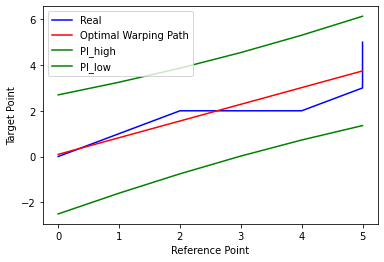

In [163]:
# 논문 그림 2.5 (a)

plt.plot(x_train,y_train,'b',label='Real') # 참값(실제 DTW매칭)
plt.plot(x_train,x_train * W + b,'r',label='Optimal Warping Path') # DTW매칭에 대한 선형 회귀
plt.xlabel('Reference Point')
plt.ylabel('Target Point')

plt.plot(x_train,high,'g',label='PI_high')
plt.plot(x_train,low,'g',label='PI_low')

plt.legend()

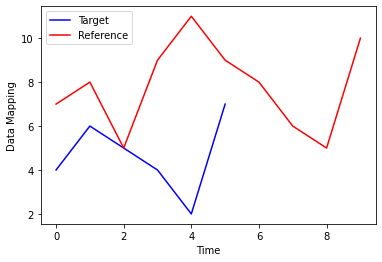

In [166]:
# 논문 그림 2.5 (b)

plt.plot(A,'b',label='Target') # Target 시계열 value
plt.plot(B,'r',label='Reference') # Reference 시계열 value
plt.xlabel('Time')
plt.ylabel('Data Mapping')

plt.legend()

In [134]:
x_train,x_train * W + b

(array([0, 1, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5]),
 array([-0.59770111,  0.65057474,  1.8988506 ,  3.14712645,  4.3954023 ,
         5.64367816,  5.64367816,  5.64367816,  5.64367816,  5.64367816,
         5.64367816,  5.64367816]))